In [7]:
import os

digitization_path = '../data/digitization-dataset/digitization-dataset'
digitization_items = os.listdir(digitization_path)

In [8]:
len([x for x in digitization_items if x.endswith('6by2')])

500

In [ ]:
detection_path = '../data/detection-dataset/detection-dataset/images'
detection_items = os.listdir(detection_path)

In [9]:
len([x for x in detection_items if x.endswith('6by2.jpg')])

500

In [ ]:
overlap_path1 = '../data/overlap-dataset/without-overlap/image'
overlap_items1 = os.listdir(overlap_path1)

In [11]:
len([x for x in overlap_items1 if '6by2' in x])

0

In [ ]:
overlap_path2 = '../data/overlap-dataset/with-overlap/image'
overlap_items2 = os.listdir(overlap_path2)

In [13]:
len([x for x in overlap_items2 if '6by2' in x])

0

In [14]:
segmentation_path = '../data/segmentation-dataset/segmentation-dataset/image'
segmentation_items = os.listdir(segmentation_path)

In [15]:
len([x for x in segmentation_items if '6by2' in x])

6000

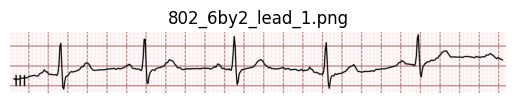

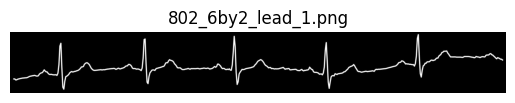

In [ ]:
import random
import cv2
from matplotlib import pyplot as plt


# Directory path
path = '../data/segmentation-dataset/segmentation-dataset/image'
images = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg')) and '6by2' in f]

# Pick random images
sample = random.sample(images, 1) 

# Read and show
for img_name in sample:
    img = cv2.imread(os.path.join(path, img_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

# Directory path
path = '../data/segmentation-dataset/segmentation-dataset/mask-png'
images = [f for f in os.listdir(path) if f in sample]

# Pick random images
sample = images

# Read and show
for img_name in sample:
    img = cv2.imread(os.path.join(path, img_name))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [2]:

def read_yolo_labels(label_path):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            cls, x, y, w, h = map(float, parts)
            boxes.append((int(cls), x, y, w, h))
    return boxes

def show_image_and_segments(images_path, labels_path):
    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png'))]
    if not image_files:
        print("No images found.")
        return

    # Pick one at random
    image_file = random.choice(image_files)
    label_file = image_file.rsplit('.', 1)[0] + '.txt'

    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)

    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    # Read labels
    boxes = read_yolo_labels(label_path)

    # Show original image
    plt.imshow(image)
    plt.title(f"Original: {image_file}")
    plt.axis('off')
    plt.show()

    # Show each cropped segment
    for i, (cls, x, y, bw, bh) in enumerate(boxes):
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)
        cropped = image[y1:y2, x1:x2]

        plt.imshow(cropped)
        plt.title(f"Class {cls} | {image_file}")
        plt.axis('off')
        plt.show()

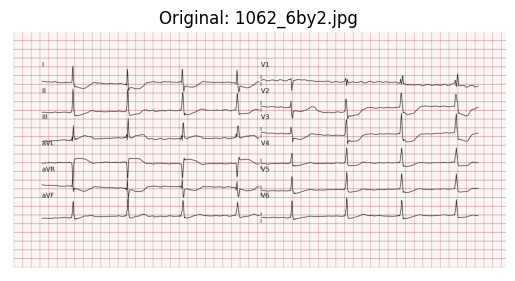

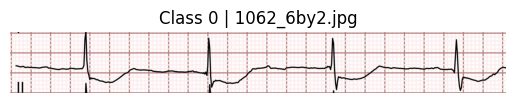

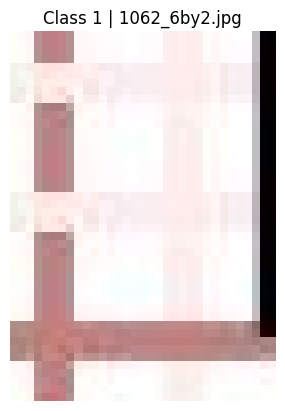

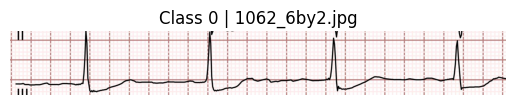

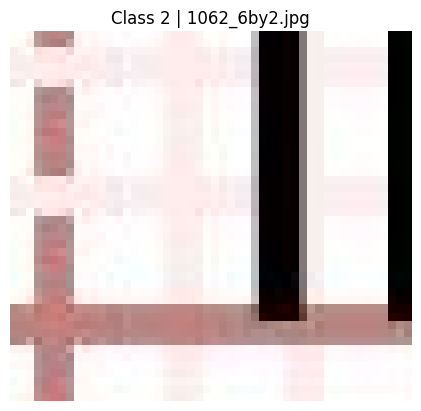

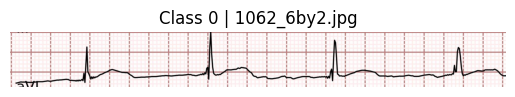

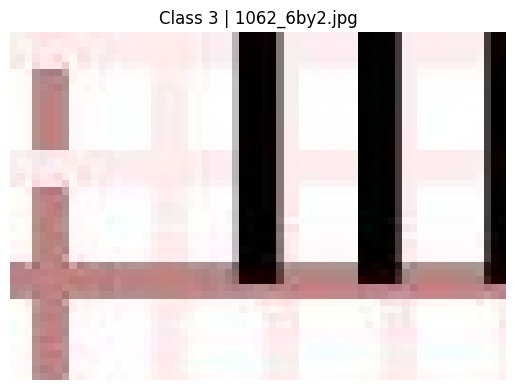

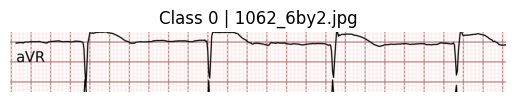

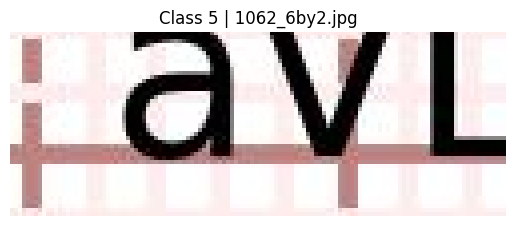

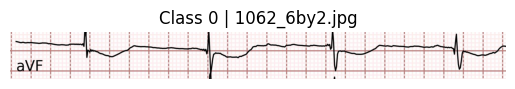

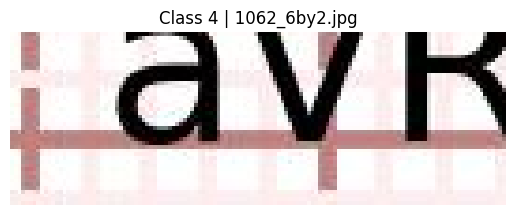

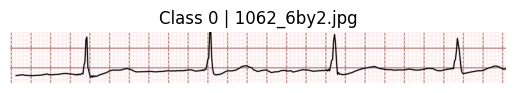

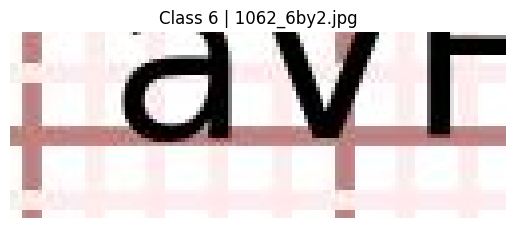

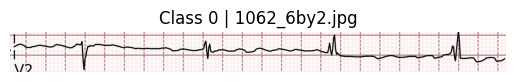

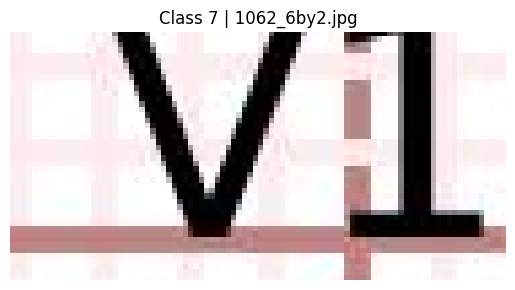

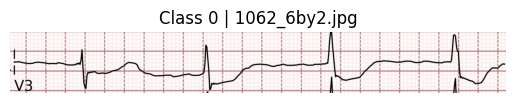

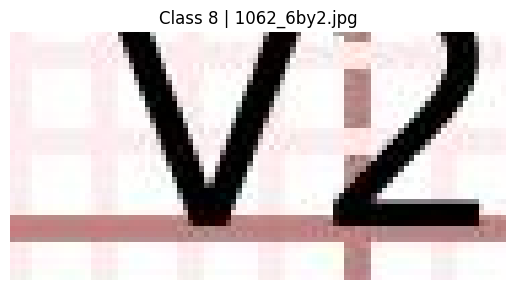

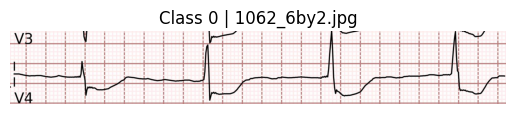

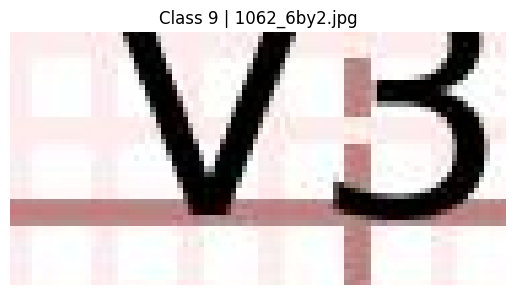

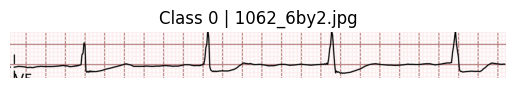

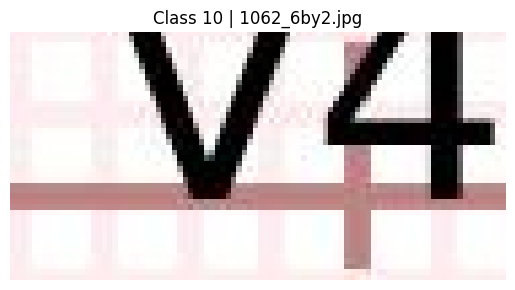

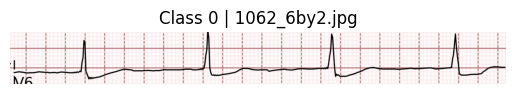

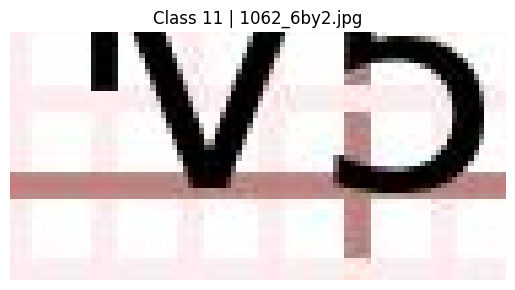

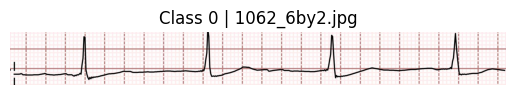

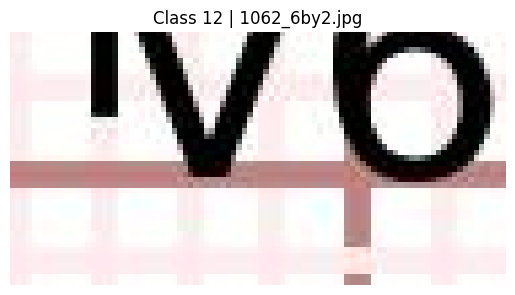

In [3]:
images_path = '../data/segmentation-dataset-6by2/test/images'
labels_path = '../data/segmentation-dataset-6by2/test/labels'
show_image_and_segments(images_path, labels_path)


In [10]:
import numpy as np 

def draw_bboxes_on_image(images_path, labels_path, class_names=None):
    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png'))]
    if not image_files:
        print("No images found.")
        return

    # Pick a random image
    image_file = random.choice(image_files)
    label_file = os.path.splitext(image_file)[0] + '.txt'

    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    # Load labels
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            cls, x, y, bw, bh = map(float, parts)
            boxes.append((int(cls), x, y, bw, bh))

    # Generate colors per class
    num_classes = max(cls for cls, *_ in boxes) + 1
    colors = np.random.randint(0, 255, size=(num_classes, 3), dtype=int)

    # Draw boxes
    for cls, x, y, bw, bh in boxes:
        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        color = tuple(map(int, colors[cls]))
        label = class_names[cls] if class_names and cls < len(class_names) else f'class_{cls}'

        cv2.rectangle(image, (x1, y1), (x2, y2), color=color, thickness=2)
        cv2.putText(image, label, (x1, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    # Show image
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.title(f"Image with Colored Bounding Boxes: {image_file}")
    plt.axis('off')
    plt.show()

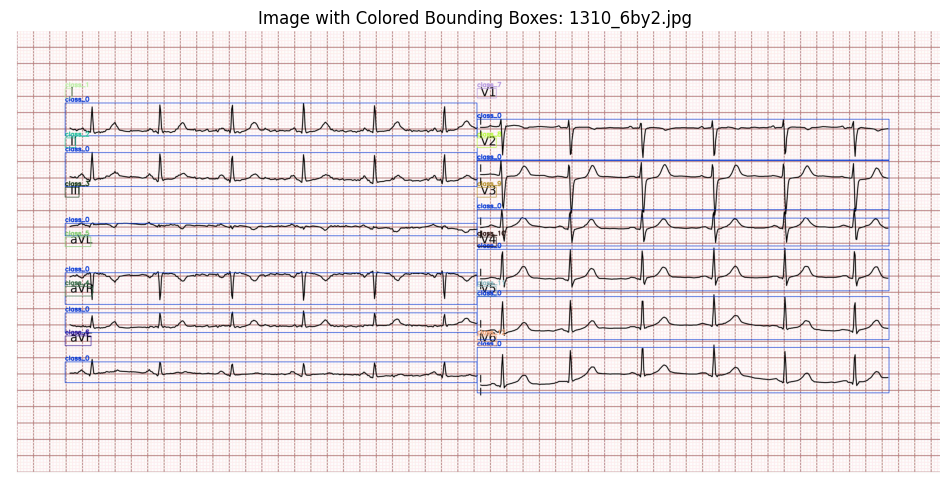

In [11]:
draw_bboxes_on_image('../data/segmentation-dataset-6by2/test/images', '../data/segmentation-dataset-6by2/test/labels')